# APARTADO 1: Aspectos básicos del texto
## 1.1 Introducción
La manipulación de datos textuales es diferente a la de datos numéricos o categóricos. Mientras que los datos numéricos permiten operaciones aritméticas y resúmenes estadísticos, el texto está compuesto por secuencias de caracteres con significado lingüístico. Para extraer valor del texto, es necesario segmentarlo, normalizarlo y analizar patrones para que los algoritmos de aprendizaje automático puedan entenderlo.
## 1.2 Naturaleza del texto
El texto es cualquier secuencia de caracteres que forman palabras, oraciones o documentos. Desde un punto de vista computacional, manejamos bytes que representan esos caracteres. En la minería de texto, transformamos estas secuencias en objetos estructurados, como tokens o vocabularios, para facilitar la extracción de información.
### Aspectos clave del texto:
- Longitud: Puede variar desde unas pocas líneas hasta millones de palabras.
- Granularidad: Podemos analizar fragmentos (palabras, oraciones) o documentos completos (páginas, libros).
## 1.3 Procesamiento y representación
Para trabajar con datos de texto, necesitamos un pipeline que incluya:
1. Recolección: Obtener documentos y texto de diversas fuentes.
2. Preprocesado: Limpiar caracteres no deseados y normalizar el texto.
3. Tokenización: Dividir el texto en unidades significativas (tokens).
4. Limpieza de stopwords: Eliminar términos muy frecuentes y poco informativos.
5. Modelado: Representar el texto mediante conteo de palabras o embeddings.
6. Análisis: Aplicar algoritmos o transformaciones (clasificación, extracción de entidades, resumen, etc.).
## 1.4 Tokenización y normalización
Tokenizar es dividir el texto en pequeñas unidades llamadas tokens. Normalizar es aplicar estándares para el análisis, como pasar todo a minúsculas y eliminar tildes. Estos pasos permiten analizar palabras como "Gato", "gato" y "GATO" como la misma.


In [ ]:
# Ejemplo de tokenización y normalización en Pandas:
import pandas as pd
from nltk import word_tokenize, download
download('punkt_tab')

texto = "¡Hola mundo! Me llamo Juan."

def tokenize(text):
    return word_tokenize(text)

df_pandas = pd.DataFrame({
    "text": [texto]
})

df_pandas["tokens"] = df_pandas["text"].apply(tokenize)

df_pandas["tokens_normalizados"] = df_pandas["tokens"].apply(lambda tokens: [token.lower() for token in tokens if token.isalnum()])

print(df_pandas)


# APARTADO 2: LIBRERÍA NLTK
## 2.1 Introducción
La librería más conocida de Python para NLP se llama NLTK (Natural Language Toolkit). Presenta herramientas para tokenización, etiquetado, análisis gramatical y gestión de corpus.


## 2.2 Uso de librerías de NLP

- Tokenización: Dividir el texto en unidades léxicas (palabras, signos de puntuación, etc.).
- Etiquetado gramatical: Asignar a cada token una categoría gramatical (sustantivo, verbo, adjetivo, etc.).
- Reconocimiento de entidades: Extraer nombres propios, organizaciones, lugares, cantidades, etc.
- Lematización o stemming: Convertir palabras a su forma base.
- Segmentación de texto: Dividir el texto en oraciones o frases completas.
- Detección de idioma: Identificar el idioma del texto.


### 2.2.1 Tokenización
La tokenización es un paso crucial en el procesamiento de texto. Si no se realiza correctamente, las fases posteriores como el etiquetado y la lematización pueden producir errores o resultados imprecisos.

**Uso de NLTK:**
NLTK (Natural Language Toolkit) ofrece varios tipos de tokenizadores, pero el más común para textos en inglés es `word_tokenize`.

**Explicación del Ejemplo:**
- `word_tokenize` utiliza un tokenizador estándar que separa palabras, signos de puntuación y caracteres especiales.
- En el ejemplo, los signos de exclamación y puntuación se consideran tokens separados.

**Consideraciones:**
- La tokenización puede variar según el idioma. Por ejemplo, en chino no hay espacios entre palabras, y en algunos idiomas se necesitan reglas específicas para separar contracciones.
- Dependiendo de la aplicación, puede ser útil mantener o eliminar los signos de puntuación. Por ejemplo:
  - **Análisis de Sentimientos:** Mantener los signos de exclamación puede ser importante para captar la emoción.
  - **Análisis Semántico:** La puntuación puede no aportar valor y podría ser descartada.




In [ ]:
# Tokenización:

import nltk

# Descargar recursos necesarios
#!pip install nltk # Instalado en Collab

import nltk
from nltk.tokenize import word_tokenize
texto = "NLTK es una librería muy potente. ¡Es mi primer uso en la U-tad de NLTK!"
tokens = word_tokenize(texto)
print(tokens)
# Output: ['NLTK', 'es', 'una', 'librería', 'muy', 'potente', '.', '¡', 'Es', 'mi', 'primer', 'uso', 'en', 'la', 'U-tad', 'de', 'NLTK', '!']


### 2.2.2 Partes de la Oración (PoS Tagging)

**Etiquetado de Partes de la Oración (PoS Tagging):**
El etiquetado de partes de la oración asigna a cada token una etiqueta que indica su función gramatical (sustantivo, verbo, adjetivo, adverbio, etc.).

**Importancia del PoS Tagging:**
- **Filtrado de Tokens:** Permite extraer tokens según su categoría, como sustantivos para análisis de contenido.
- **Lematización y Stemming:** Mejora la precisión al conocer la categoría gramatical de las palabras.
- **Análisis Sintáctico:** Es la base para sistemas de análisis sintáctico más profundos.

**Uso de NLTK:**
NLTK utiliza modelos estadísticos, como el "average perceptron tagger", para realizar el etiquetado. Por ejemplo:
- **NNP:** Nombre propio (Proper Noun)
- **VB:** Verbo
- **RB:** Adverbio

**Consideraciones:**
- **Idiomas Diferentes:** En idiomas distintos del inglés, se necesitan otros modelos o librerías específicas.
- **Ejemplo en Español:** Utilizando el corpus `cess_esp` y el etiquetador `TnT`, se pueden obtener etiquetas gramaticales en español, aunque algunas etiquetas pueden ser difíciles de interpretar.

In [ ]:
# Etiquetado gramatical (PoS Tagging):
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
download('averaged_perceptron_tagger_eng')
texto = "Pedro runs fast and Mary sings."
tokens = word_tokenize(texto)
etiquetas = pos_tag(tokens)
print(etiquetas)
# Output: [('Pedro', 'NNP'), ('runs', 'VBZ'), ('fast', 'RB'), ('and', 'CC'), ('Mary', 'NNP'), ('sings', 'VBZ'), ('.', '.')]


### 2.2.3 Steaming y Lematizacion

En minería de texto, es común agrupar palabras según su raíz léxica. Existen dos enfoques principales para lograr esto:

**Stemming:**
- **Definición:** Recorta las palabras a sus radicales sin considerar si la palabra existe en el vocabulario.
- **Ejemplo:** "corriendo", "corrieron" y "correrá" podrían convertirse en "corr" usando un stemmer sencillo.
- **Herramienta:** En inglés, se utiliza `PorterStemmer`. En español, se puede usar `SnowballStemmer('spanish')`.

**Lematización:**
- **Definición:** Utiliza diccionarios o reglas lingüísticas para devolver la forma canónica (lema) de una palabra.
- **Ejemplo:** "corriendo" se convierte en "correr".
- **Precisión:** Es más precisa que el stemming, pero requiere más recursos.
- **Herramienta:** En inglés, se utiliza `WordNet` y sus diccionarios.

**Consideraciones:**
- **Stemming:** Es rápido y sencillo, pero menos preciso.
- **Lematización:** Es más precisa y adecuada para análisis detallados, aunque más costosa en términos de recursos.

In [ ]:
# Lematización y stemming:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')

texto = "playing played plays player"

# Tokenize
tokens = word_tokenize(texto)
print("Tokens:", tokens)


# Stemming - Rápido
stemmer = PorterStemmer()
stems = [stemmer.stem(token) for token in tokens]
print("Stemming:", stems)

# Lematización - Lento
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
print("Lematización:", lemmas)
# Output: Tokens: ['playing', 'played', 'plays', 'player']
# Stemming: ['play', 'play', 'play', 'player']
# Lematización: ['play', 'play', 'play', 'player']


# APARTADO 3: ENFOQUE DE PANDAS PARA MINERÍA DE TEXTO
## 3.1 Introducción
En las secciones anteriores, abordamos la preparación del texto (tokenización, limpieza, expresiones regulares) y el procesamiento lingüístico con librerías como NLTK. Sin embargo, en muchos casos de minería de texto, la fase de análisis y transformación masiva de los datos se beneficia enormemente de herramientas que permitan manipular grandes volúmenes de información de forma tabular.
Pandas se ha convertido en un elemento básico del ecosistema Python para la ciencia de datos. Aunque nació con un enfoque hacia datos numéricos y categóricos, sus potentes estructuras (DataFrames y Series) y operaciones vectorizadas resultan muy valiosas también en escenarios de minería de texto.


## 3.2 Pandas en el texto
La minería de texto, especialmente con colecciones de documentos extensas, requiere métodos eficientes para almacenar y manipular la información. Las librerías orientadas a DataFrames son ideales para el análisis exploratorio, la transformación y la fusión de datos de distinta naturaleza.
En un DataFrame, podemos filtrar rápidamente los documentos por ciertos criterios (por ejemplo, fecha, presencia de determinada palabra, clasificación previa, etc.), ordenar según su longitud o agruparlos según características. Esto simplifica la definición de subconjuntos de datos textuales específicos.
En minería de texto, es común ver que cada fila del DataFrame represente un documento (tweet, reseña, noticia, etc.), y se incluyan columnas con diferentes atributos. Por ejemplo:
- text_original: el texto tal cual se extrajo.
- texto_limpio: el texto luego de una limpieza con expresiones regulares.
- tokens: una lista de tokens (por ejemplo, generada con NLTK).
- pos_tags: las etiquetas gramaticales correspondientes.
- entidades: una lista de entidades reconocidas, etc.


## 3.3 Minería de texto con DataFrames
Tras las primeras fases de recolección de datos, será necesario trabajar con ellos para limpiarlos, normalizarlos, etc. Finalmente, podremos utilizar esos datos para realizar diferentes análisis en función de nuestro caso de uso.
Supongamos que queremos limpiar el texto de caracteres no deseados (comas, puntos repetidos, secuencias de espacios, etc.) y normalizar a minúsculas. Previo a un análisis con NLTK, conviene un DataFrame con una columna “texto_limpio”.


In [ ]:
# Ejemplo de limpieza y normalización de texto en Pandas:
import re
import pandas as pd

textos_sucios = [
    "Texto con espacios al final  ",
    "Texto   con   múltiples   espacios   entre   palabras.",
    "Texto\tcon\tnuevos\tlíneas\ty tabulaciones.",
    "Texto.Con.Puntos.Separados.",
    "Texto..Con..Doble..Punto..",
    "Texto...Con...Triple...Punto...",
    "TEXTO EN MAYÚSCULAS",
    "Mix de MaYúScUlAs y minúsculas",
    "Texto con   muchos   espacios   y...puntos...",
    "Texto con puntuación al final.......",
    ".........Muchos puntos al principio",
    "Texto con puntos ... entre palabras",
    "Texto con \n saltos de linea \r y retornos de carro \r\n",
    "Texto con espacios \t \n \r combinados",
    "Texto con     muchos espacios seguidos"
]

df_pandas = pd.DataFrame({
    "texto": textos_sucios
})

df_pandas["texto_limpio"] = df_pandas["texto"].apply(lambda txt: re.sub(r"\s+", " ", txt.lower()))
df_pandas["texto_limpio"] = df_pandas["texto_limpio"].apply(lambda txt: re.sub(r"\.{2,}", ".", txt))

print(df_pandas)


Una vez que se ha normalizado el texto y limpiado, podemos pasar a las siguientes etapas del pipeline, tokenizar para posteriormente obtener tags o realizar los análisis necesarios:


In [ ]:
# Ejemplo de tokenización en Pandas con NLTK:
import nltk

# nltk.download('punkt_tab') #Descargado en la primera celda

def tokenize_nltk(text):
    return nltk.word_tokenize(text)

df_pandas["tokens"] = df_pandas["texto_limpio"].apply(tokenize_nltk)
print(df_pandas)


En este punto, obtendremos un DataFrame con una nueva columna con los tokens correspondientes. Es en este momento cuando podemos comenzar a aplicar diferentes analíticas y transformaciones.
Un uso muy frecuente tras el preprocesamiento es agrupar o agregar estadísticas basadas en el texto. Por ejemplo:
- Calcular la longitud en tokens.
- Obtener la media de tokens o la frecuencia de una palabra.


In [ ]:
# Ejemplo de cálculo de longitud en tokens:
df_pandas["num_tokens"] = df_pandas["tokens"].apply(lambda tok_list: len(tok_list))

mean_tokens = df_pandas["num_tokens"].mean()
print(mean_tokens)


## 3.4 Casos de uso en minería de texto
Pandas proporciona funcionalidades que facilitan el análisis de texto. Gracias a la posibilidad de creación de columnas y aplicar NLTK, incluso combinado con re o regex, podemos crear flags, normalizar y limpiar datos, etc.
El orden o detalle de los pasos que se realicen dependerá del caso de uso. Por ejemplo:
- **Análisis de redes sociales**: Descargar tweets vía API, guardar en un CSV, filtrar retweets, normalizar texto, y extraer tokens/hashtags. Luego computar la frecuencia de cada hashtag por franja horaria.
- **Clasificación de reseñas**: Cada fila es una reseña de un producto, con su puntaje y texto. Limpiar y tokenizar con NLTK, generar una columna “lemmas”, y luego vectorizar para un modelo de clasificación.
- **Detección de fraude en logs**: Aplicar expresiones regulares para extraer códigos de error y combinarlos con la información del usuario. Buscar correlacionar patrones de error con la categoría “fraud”.
- **Investigación lingüística**: Importar capítulos de libros, etiquetar partes gramaticales con NLTK, y extraer estadísticas de complejidad lingüística (ej. densidad de verbos, ratio adjetivos/sustantivos, etc.) usando “groupby autor”.


# APARTADO 4: Visualización de texto: wordclouds en Python
## 4.1 Introducción
Después de limpiar, tokenizar y procesar el texto, es importante comunicar o visualizar los resultados de manera efectiva. Una de las formas más populares y atractivas de visualización de texto es la wordcloud (nube de palabras). Una wordcloud muestra gráficamente las palabras más frecuentes en un corpus o documento, con el tamaño de cada palabra proporcional a su frecuencia o relevancia.


## 4.2 Uso de wordclouds
La librería wordcloud en Python es la más común para generar wordclouds. Para instalarla, ejecuta:
`pip install wordcloud`
### Principales funcionalidades:
- width, height: dimensiones de la imagen.
- background_color: color de fondo (por defecto "white").
- max_words: número máximo de palabras.
- mask: matriz para definir zonas donde pintar texto.
- stopwords: conjunto de palabras a ignorar.
- colormap: paleta de colores.
- maxfontsize: tamaño máximo de letra.
### Flujo típico:
1. Preparar un diccionario {“palabra”: frecuencia} o un string con todo el texto preprocesado.
2. Instanciar un objeto WordCloud(...).
3. Generar la nube de palabras con .generate(...) (para string) o .generate_from_frequencies(...) (para diccionario).
4. Mostrar con matplotlib o guardar en un archivo con .to_file("mi_wordcloud.png").


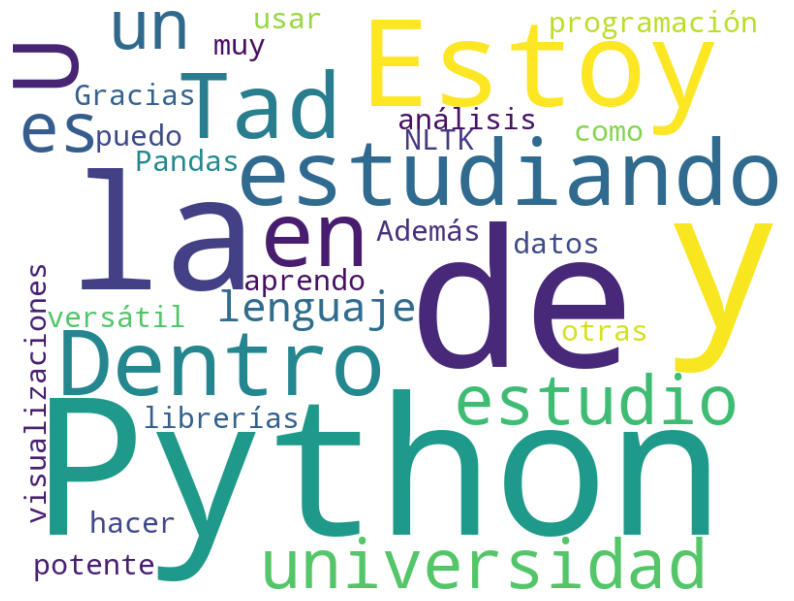

In [24]:
# Ejemplo de generación de wordcloud:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texto = """
Estoy estudiando en la U-Tad. Dentro de la universidad estudio Python.
Python es un lenguaje de programación muy potente y versátil.
Gracias a Python puedo hacer análisis de datos y visualizaciones.
Además, aprendo a usar librerías como Pandas, NLTK y otras.
"""

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color="white",
    max_words=100
)

# Generamos la nube desde un string
wordcloud.generate(texto)

# Visualizar
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## 4.3 Uso con Pandas
En minería de texto, solemos tener un DataFrame con una columna de tokens. Podemos procesar su frecuencia de la siguiente manera:


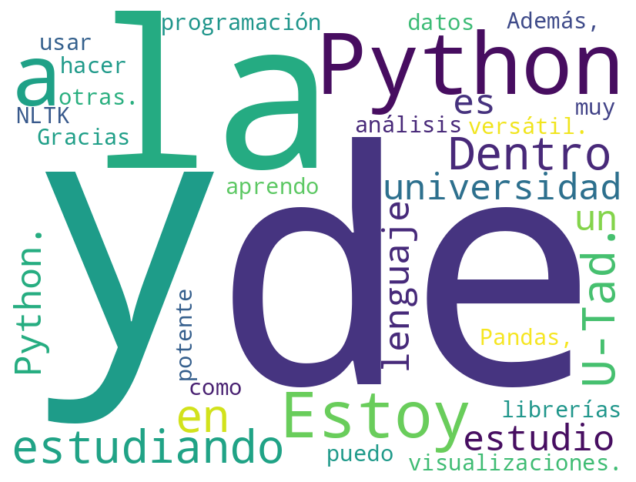

In [25]:
# Ejemplo de uso con Pandas:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texto = """Estoy estudiando en la U-Tad. Dentro de la universidad estudio Python. Python es un lenguaje de programación muy potente y versátil. Gracias a Python puedo hacer análisis de datos y visualizaciones. Además, aprendo a usar librerías como Pandas, NLTK y otras."""
tokens = texto.split()

df_pandas = pd.DataFrame({
    "token": tokens
})

freq_counter = Counter(df_pandas["token"])

wordcloud_data = dict(freq_counter.most_common(100))  # top 100 palabras

wordcloud_pandas = WordCloud(width=800, height=600, background_color="white").generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pandas, interpolation="bilinear")
plt.axis("off")
plt.show()


## 4.4 Personalización
Podemos agregar un conjunto propio de palabras a ignorar (stopwords), especialmente si trabajamos en español u otro idioma.

Aquí aplicaremos diversas técncias observadas previamente.

In [69]:
# Importamos librerías
import pandas as pd
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import regex

In [70]:
texto = """
Estoy estudiando en la U-Tad. Dentro de la universidad estudio Python.
Python es un lenguaje de programación muy potente y versátil.
Gracias a Python puedo hacer análisis de datos y visualizaciones.
Además, aprendo a usar librerías como Pandas, NLTK y otras.
"""

In [71]:
# Leemos las stop words del fichero y las juntamos con las inglesas.
spanish_stop_words = pd.read_csv("./spanish.txt", header=None).values.T[0]
custom_stops = set(spanish_stop_words)
all_stops = STOPWORDS.union(custom_stops)

In [72]:
#Procesamos el texto
tokens = texto.split()

df_pandas = pd.DataFrame({
    "token": tokens
})

#Pasamos las palabras a minusculas
df_pandas["token_lower"] = df_pandas["token"].str.lower()

#Eliminamos caracteres no alfanumericos
expres = regex.compile(r"[^\w]")
tokens_lower_filtered = [regex.sub(expres, "", word) for word in df_pandas["token_lower"]]

#Eliminamos las stop words
filtered_stop_words = [word for word in tokens_lower_filtered if word not in all_stops]

#Constamos la frecuencia de las palabras
freq_counter = Counter(filtered_stop_words)
wordcloud_data = dict(freq_counter.most_common(100))  # top 100 palabras

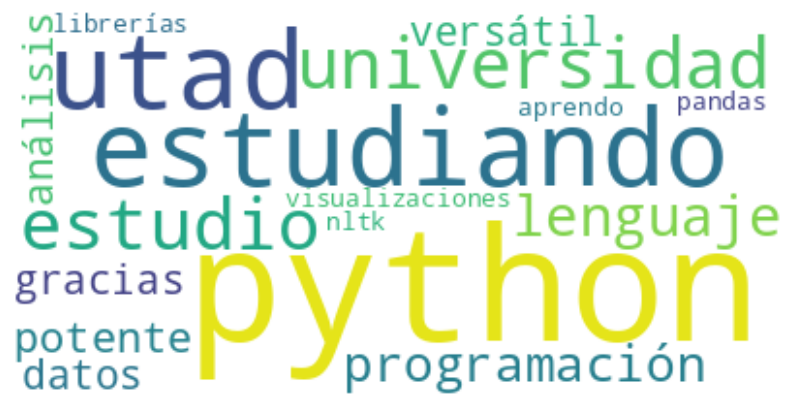

In [73]:
#Preparamos el WordCloud
wc_custom = WordCloud(
    background_color="white",
    max_words=200
)

#Pasamos las frecuencias al word cloud
wc_custom = wc_custom.generate_from_frequencies(wordcloud_data)

# Visualizar
plt.figure(figsize=(10, 8))
plt.imshow(wc_custom, interpolation="bilinear")
plt.axis("off")
plt.show()